# Part One - Exploratory Data Analysis & SARIMA On Monthly Sales

**Brief**

**Background:**

1000ml Retail wants help forecasting their Q3 sales and profit.

**Objective:**
They would like to know sales and profit by category by month.

**Deliverable:**
A 10 min presentation outlining your methodology, reasoning and findings to the (global) sales team.

This presentation should provide actionable information.

# References

* [School Years In Different Countries](https://www.infoplease.com/world/world-statistics/school-years-around-world)
* Angloinfo website has been helpful for school years. Quarter three (Q3) is July, August and September which is back to school season for many countries.

# Look At Data / Exploratory Data Analysis (EDA) 

In [0]:
# Import packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [0]:
from google.colab import drive

drive.mount('/content/gdrive', force_remount = False)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
# Load in data with pandas.

retail_data = pd.read_csv('/content/gdrive/My Drive/1000mlRetail.csv')

# Preview retail data.
retail_data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Postal Code,Market,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,32298,CA-2016-124891,2016-07-31,2016-07-31,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,United States,10024.0,US,East,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical
1,26341,IN-2017-77878,2017-02-05,2017-02-07,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,Australia,NaN,APAC,Oceania,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical
2,25330,IN-2017-71249,2017-10-17,2017-10-18,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,Australia,NaN,APAC,Oceania,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium
3,13524,ES-2017-1579342,2017-01-28,2017-01-30,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,Germany,NaN,EU,Central,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium
4,47221,SG-2017-4320,2017-11-05,2017-11-06,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,Senegal,NaN,Africa,Africa,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical


In [0]:
# Shape of retail data:

retail_data.shape

(51290, 24)

In [0]:
# Columns:

retail_data.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'City', 'State', 'Country',
       'Postal Code', 'Market', 'Region', 'Product ID', 'Category',
       'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping Cost', 'Order Priority'],
      dtype='object')

In [0]:
# Look at date column:

retail_data['Order Date'].dtype

dtype('O')

In [0]:
# Look at ship date column:
# Dates not in datetime format.

retail_data['Ship Date'].dtype

dtype('O')

## Convert Times To DateTime

In [0]:
retail_data['Order Date'] = pd.to_datetime(retail_data['Order Date'])

retail_data['Ship Date'] = pd.to_datetime(retail_data['Ship Date'])

In [0]:
# Check that Order Date & Ship Date are indeed datetimes.

retail_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
Row ID            51290 non-null int64
Order ID          51290 non-null object
Order Date        51290 non-null datetime64[ns]
Ship Date         51290 non-null datetime64[ns]
Ship Mode         51290 non-null object
Customer ID       51290 non-null object
Customer Name     51290 non-null object
Segment           51290 non-null object
City              51290 non-null object
State             51290 non-null object
Country           51290 non-null object
Postal Code       9994 non-null float64
Market            51290 non-null object
Region            51290 non-null object
Product ID        51290 non-null object
Category          51290 non-null object
Sub-Category      51290 non-null object
Product Name      51290 non-null object
Sales             51290 non-null float64
Quantity          51290 non-null int64
Discount          51290 non-null float64
Profit            51290 non-null fl

In [0]:
# Look at Order Date info.

retail_data['Order Date'].describe()

count                   51290
unique                   1430
top       2018-06-18 00:00:00
freq                      135
first     2015-01-01 00:00:00
last      2018-12-31 00:00:00
Name: Order Date, dtype: object

In [0]:
# Look at Ship Date info.

retail_data['Ship Date'].describe()

count                   51290
unique                   1460
top       2018-11-22 00:00:00
freq                      130
first     2015-01-01 00:00:00
last      2018-12-31 00:00:00
Name: Ship Date, dtype: object

## Number Of Orders Per Month

In [0]:
# Trying groupby on datetimes:
# Obtain counts for each month
# Reference: https://stackoverflow.com/questions/18233107/pandas-convert-datetime-to-end-of-month

retail_data['Order_Date_Month'] = retail_data['Order Date'].astype('datetime64[M]')

In [0]:
# Check dates:

retail_data.head(3)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Postal Code,Market,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Order_Date_Month
0,32298,CA-2016-124891,2016-07-31,2016-07-31,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,United States,10024.0,US,East,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical,2016-07-01
1,26341,IN-2017-77878,2017-02-05,2017-02-07,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,Australia,NaN,APAC,Oceania,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical,2017-02-01
2,25330,IN-2017-71249,2017-10-17,2017-10-18,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,Australia,NaN,APAC,Oceania,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium,2017-10-01


In [0]:
# Trying groupby on datetimes:
# Obtain counts for each day.

num_orders_permonth = retail_data.groupby('Order_Date_Month')['Row ID'].count()

num_orders_permonth.head(12)

Order_Date_Month
2015-01-01     433
2015-02-01     378
2015-03-01     539
2015-04-01     564
2015-05-01     566
2015-06-01     917
2015-07-01     495
2015-08-01     878
2015-09-01    1052
2015-10-01     774
2015-11-01    1139
2015-12-01    1263
Name: Row ID, dtype: int64

Text(0.5, 1.0, 'Number Of Orders Per Month \n')

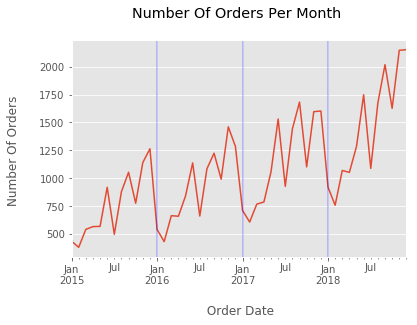

In [0]:
# Line Plot On Number Of Orders Over Time

plt.style.use('ggplot')

num_orders_permonth.plot()
plt.xlabel('\n Order Date')
plt.ylabel('Number Of Orders \n')

# Vertical lines at start of each year
plt.axvline(x = '2016-01-01', linewidth=2, color='blue', alpha = 0.2) 
plt.axvline(x = '2017-01-01', linewidth=2, color='blue', alpha = 0.2)
plt.axvline(x = '2018-01-01', linewidth=2, color='blue', alpha = 0.2)
plt.title('Number Of Orders Per Month \n')

With this lineplot for over the months, it is even more clearer that there is steady growth in the number of orders. The peak number of orders during each year occurs at around November & December. Black Friday shopping sales and Holidays shopping (in the Western countries) are very possible factors.

## A Look At Sales

In [0]:
# Sales column

retail_data['Sales'].describe()

count    51290.000000
mean       246.490581
std        487.565361
min          0.444000
25%         30.758625
50%         85.053000
75%        251.053200
max      22638.480000
Name: Sales, dtype: float64

### Sales Plot For Each Month 

In [0]:
# Obtain monthly order sales

sales_permonth = retail_data.groupby('Order_Date_Month')['Sales'].sum()

sales_permonth.head(12)

Order_Date_Month
2015-01-01     98898.48886
2015-02-01     91152.15698
2015-03-01    145729.36736
2015-04-01    116915.76418
2015-05-01    146747.83610
2015-06-01    215207.38022
2015-07-01    115510.41912
2015-08-01    207581.49122
2015-09-01    290214.45534
2015-10-01    199071.26404
2015-11-01    298496.53752
2015-12-01    333925.73460
Name: Sales, dtype: float64

Text(0.5, 1.0, 'Order Sales Monthly\n')

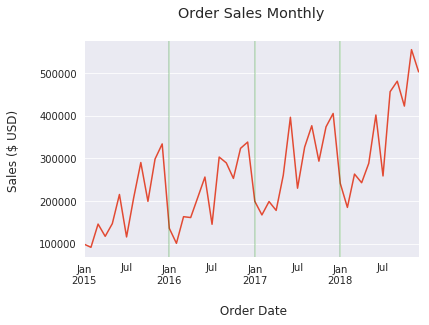

In [0]:
# Sales Plot For Each Month

# Style:

sns.set_style('darkgrid')

# Have ci = False to remove confidence intervals.
sales_permonth.plot()
plt.xlabel('\n Order Date')
plt.ylabel('Sales ($ USD) \n')

# Vertical lines at start of each year
plt.axvline(x = '2016-01-01', linewidth=2, color='green', alpha = 0.2) 
plt.axvline(x = '2017-01-01', linewidth=2, color='green', alpha = 0.2)
plt.axvline(x = '2018-01-01', linewidth=2, color='green', alpha = 0.2)

# Title
plt.title('Order Sales Monthly\n')

**Observations**

Peak Sales for the year usually occur at around August/September and the Holiday Seasons. August & September are important months as it is back to school season for many of the developed countries with Australia and Brazil starting school outside of these two months.

## A Look At Profits

In [0]:
# Profit Column

retail_data['Profit'].describe()

count    51290.000000
mean        28.610982
std        174.340972
min      -6599.978000
25%          0.000000
50%          9.240000
75%         36.810000
max       8399.976000
Name: Profit, dtype: float64

### Profits Per Month 

Profits are the sales minus the costs. Investigating the amount of profits over time for each month.

In [0]:
# Group by Month and find total profit for each month:

order_profits_monthly = retail_data.groupby(['Order_Date_Month'])['Profit'].sum()

In [0]:
order_profits_monthly.head()

Order_Date_Month
2015-01-01     8321.80096
2015-02-01    12417.90698
2015-03-01    15303.56826
2015-04-01    12902.32438
2015-05-01    12183.82870
Name: Profit, dtype: float64

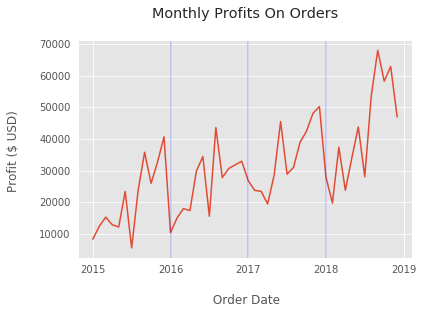

In [0]:
# Monthly Profits On Orders Plot

plt.style.use('ggplot')

order_profits_monthly.plot()
plt.xlabel('\n Order Date')
plt.ylabel('Profit ($ USD) \n')
# Vertical lines at start of each year
plt.axvline(x = '2016-01-01', linewidth=2, color='blue', alpha = 0.15) 
plt.axvline(x = '2017-01-01', linewidth=2, color='blue', alpha = 0.15)
plt.axvline(x = '2018-01-01', linewidth=2, color='blue', alpha = 0.15)

# Title
plt.title('Monthly Profits On Orders\n')

# Tight Layout:

plt.autoscale()

# Save image (bbox_inches = tight gives labels):
# Reference: https://stackoverflow.com/questions/6774086/why-is-my-xlabel-cut-off-in-my-matplotlib-plot

plt.savefig('monthly_orderProfits.png', dpi=200, bbox_inches = "tight")

# Show:

plt.show()

### Year Over Year Growth

In [0]:
# Trying groupby on datetimes:
# Obtain counts for each year
# Reference: https://stackoverflow.com/questions/18233107/pandas-convert-datetime-to-end-of-month

retail_data['Order_Date_Year'] = retail_data['Order Date'].astype('datetime64[Y]')

retail_data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Postal Code,Market,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Order_Date_Month,Order_Date_Year
0,32298,CA-2016-124891,2016-07-31,2016-07-31,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,United States,10024.0,US,East,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical,2016-07-01,2016-01-01
1,26341,IN-2017-77878,2017-02-05,2017-02-07,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,Australia,NaN,APAC,Oceania,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical,2017-02-01,2017-01-01
2,25330,IN-2017-71249,2017-10-17,2017-10-18,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,Australia,NaN,APAC,Oceania,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium,2017-10-01,2017-01-01
3,13524,ES-2017-1579342,2017-01-28,2017-01-30,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,Germany,NaN,EU,Central,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium,2017-01-01,2017-01-01
4,47221,SG-2017-4320,2017-11-05,2017-11-06,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,Senegal,NaN,Africa,Africa,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical,2017-11-01,2017-01-01


In [0]:
# Group by Month and find total profit for each month:

order_profits_annual = retail_data.groupby(['Order_Date_Year'])['Profit'].sum()

order_profits_annual

Order_Date_Year
2015-01-01    248940.81154
2016-01-01    307415.27910
2017-01-01    406935.23018
2018-01-01    504165.97046
Name: Profit, dtype: float64

In [0]:
# Take differences:

order_profits_annual.diff()

Order_Date_Year
2015-01-01            NaN
2016-01-01    58474.46756
2017-01-01    99519.95108
2018-01-01    97230.74028
Name: Profit, dtype: float64

## Counts (Number Of Orders) By Category 

In [0]:
# Check out .groupby Category:
# We have furniture, office supplies and technology.

category_order_counts = retail_data.groupby('Category')['Row ID'].count().sort_values(ascending = False)

category_order_counts

Category
Office Supplies    31273
Technology         10141
Furniture           9876
Name: Row ID, dtype: int64

In [0]:
# Total number of orders.

category_order_counts.sum()

51290

### Pie Chart

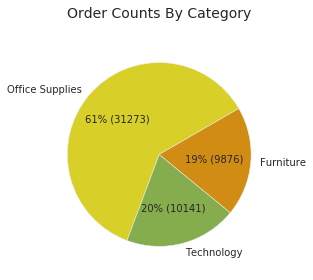

In [0]:
# Run a pie chart for Categories:
# Reference: https://www.youtube.com/watch?v=MPiz50TsyF0
# Reference: https://stackoverflow.com/questions/6170246/how-do-i-use-matplotlib-autopct

pie_labels = ['Office Supplies', 'Technology', 'Furniture']

def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val=int((pct*total/100.0) + 0.5)
        return '{p:.0f}% ({v:d})'.format(p=pct,v=val)
    return my_autopct

plt.pie(category_order_counts, labels = pie_labels, 
        autopct = make_autopct(category_order_counts),
        startangle = 30,
        colors = ['#D8D028', '#85AD4E', '#D18C14'])

plt.title('Order Counts By Category\n', size = 14)

plt.tight_layout()
plt.savefig('pie_catgCounts.png', dpi = 300)
plt.show()


## Counts By Sub Category

I could put some of this data in a slide or mention some of these sub-categories in the Counts By Category section.

In [0]:
# Look at sub-categories:

retail_data.groupby('Sub-Category')['Row ID'].count()

Sub-Category
Accessories    3075
Appliances     1755
Art            4883
Binders        6152
Bookcases      2411
Chairs         3434
Copiers        2223
Envelopes      2435
Fasteners      2420
Furnishings    3170
Labels         2606
Machines       1486
Paper          3538
Phones         3357
Storage        5059
Supplies       2425
Tables          861
Name: Row ID, dtype: int64

In [0]:
# Look at sub-categories:

retail_data.groupby('Sub-Category')['Row ID'].count().sort_values(ascending = False)

Sub-Category
Binders        6152
Storage        5059
Art            4883
Paper          3538
Chairs         3434
Phones         3357
Furnishings    3170
Accessories    3075
Labels         2606
Envelopes      2435
Supplies       2425
Fasteners      2420
Bookcases      2411
Copiers        2223
Appliances     1755
Machines       1486
Tables          861
Name: Row ID, dtype: int64

In [0]:
# Find Categories for the top five sub-categories:

top_five_subcatg = ['Binders', 'Storage', 'Art', 'Paper', 'Chairs']

retail_data[retail_data['Sub-Category'].isin(top_five_subcatg)].loc[:, ['Category', 'Sub-Category']].head(12)

,Category,Sub-Category
1,Furniture,Chairs
6,Furniture,Chairs
8,Office Supplies,Binders
13,Furniture,Chairs
22,Furniture,Chairs
29,Furniture,Chairs
32,Furniture,Chairs
45,Office Supplies,Binders
46,Furniture,Chairs
47,Furniture,Chairs


### Top Five Sub-Categories

1. Binders (Office Supplies)
2. Storage (Office Supplies)
3. Art (Office Supplies)
4. Paper (Office Supplies)
5. Chairs (Furniture)

In [0]:
# Sort order counts for each sub category in category.

retail_data.groupby(['Category'])['Sub-Category'].value_counts(ascending = False)

Category         Sub-Category
Furniture        Chairs          3434
                 Furnishings     3170
                 Bookcases       2411
                 Tables           861
Office Supplies  Binders         6152
                 Storage         5059
                 Art             4883
                 Paper           3538
                 Labels          2606
                 Envelopes       2435
                 Supplies        2425
                 Fasteners       2420
                 Appliances      1755
Technology       Phones          3357
                 Accessories     3075
                 Copiers         2223
                 Machines        1486
Name: Sub-Category, dtype: int64

## Groupby Counts For Region

I could point out top three sub-categories in each category. Maybe look into best selling products.

In [0]:
# Look at .groupby Region:

retail_data.groupby('Region')['Row ID'].count()

Region
Africa             4587
Canada              384
Caribbean          1690
Central           11117
Central Asia       2048
EMEA               5029
East               2848
North              4785
North Asia         2338
Oceania            3487
South              6645
Southeast Asia     3129
West               3203
Name: Row ID, dtype: int64

Not sure if I want to groupby region. It is not known what is Central, East, South, West in terms of countries.

## Groupby Counts For Market (*)

In [0]:
# Look at groupby Market

retail_data.groupby('Market')['Row ID'].count().sort_values(ascending = False)

Market
APAC      11002
LATAM     10294
EU        10000
US         9994
EMEA       5029
Africa     4587
Canada      384
Name: Row ID, dtype: int64

* APAC = Asia - Pacific
* LATAM = Latin America
* EU = European Union
* US = United States
* EMEA = Europe, Middle East & Africa

### Counts By City

In [0]:
retail_data.groupby('City')['Row ID'].count().sort_values(ascending = False).head(20)

City
New York City    915
Los Angeles      747
Philadelphia     537
San Francisco    510
Santo Domingo    443
Manila           432
Seattle          428
Houston          377
Tegucigalpa      362
Jakarta          337
Managua          336
Lagos            333
Chicago          314
Istanbul         314
Mexico City      300
Bangkok          287
London           281
Sydney           271
Cairo            248
Vienna           245
Name: Row ID, dtype: int64

### Counts By Country (*)



In [0]:
retail_data.groupby('Country')['Row ID'].count().sort_values(ascending = False).head(12)

Country
United States     9994
Australia         2837
France            2827
Mexico            2644
Germany           2065
China             1880
United Kingdom    1633
Brazil            1599
India             1555
Indonesia         1390
Turkey            1378
Italy             1108
Name: Row ID, dtype: int64

The United States is a big market as a region and as a country.

Maybe look at Turkey to see if it in Europe / EU or Asia.

**Top 10 Countries**

* USA (North America)
* Australia (APAC)
* France (EU)
* Mexico (North America)
* Germany (EU)
* China (APAC)
* UK (EU)
* Brazil (LATAM)
* India (APAC)
* Indonesia (APAC)


### Group By Market & Country 

In [0]:
groupby_market_country = retail_data.groupby(['Market'])['Country'].value_counts(ascending = False)

groupby_market_country.head()

Market  Country    
APAC    Australia      2837
        China          1880
        India          1555
        Indonesia      1390
        Philippines     681
Name: Country, dtype: int64

Out of curiousity, it was worth a look. Top countries for each market are in the most frequent orders by country.

### Group By Country & City

Out of curiousity I want to explore grouping by country and city.

In [0]:
retail_data.groupby(['Country'])['City'].value_counts(ascending = False).head(20)

Country      City       
Afghanistan  Kabul          41
             Herat           5
             Jalalabad       5
             Kandahar        4
Albania      Vlore           6
             Shkoder         4
             Korce           3
             Durres          2
             Elbasan         1
Algeria      Algiers        55
             Oran           37
             Annaba         20
             Constantine    12
             Guelma         11
             Saida          10
             Batna           8
             Messaad         8
             Skikda          6
             Baraki          4
             Mostaganem      4
Name: City, dtype: int64

This output is not helpful. I will try to associate top countries with their respective top cities for most frequent orders.

In [0]:
# Top Ten Countries:

# Top ten countries
top_ten_countries = ['United States', 'Australia', 'France', 'Mexico',
                     'Germany', 'China', 'United Kingdom',
                     'Brazil', 'India', 'Indonesia']

top_ten_freq_countries_orders = retail_data[retail_data['Country'].isin(top_ten_countries)]

top_ten_freq_countries_orders.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Postal Code,Market,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Order_Date_Month,Order_Date_Year
0,32298,CA-2016-124891,2016-07-31,2016-07-31,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,United States,10024.0,US,East,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical,2016-07-01,2016-01-01
1,26341,IN-2017-77878,2017-02-05,2017-02-07,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,Australia,NaN,APAC,Oceania,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical,2017-02-01,2017-01-01
2,25330,IN-2017-71249,2017-10-17,2017-10-18,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,Australia,NaN,APAC,Oceania,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium,2017-10-01,2017-01-01
3,13524,ES-2017-1579342,2017-01-28,2017-01-30,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,Germany,NaN,EU,Central,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium,2017-01-01,2017-01-01
5,22732,IN-2017-42360,2017-06-28,2017-07-01,Second Class,JM-15655,Jim Mitchum,Corporate,Sydney,New South Wales,Australia,NaN,APAC,Oceania,TEC-PH-10000030,Technology,Phones,"Samsung Smart Phone, with Caller ID",2862.675,5,0.1,763.2750,897.35,Critical,2017-06-01,2017-01-01


## Taking A Look At Products

Out of curiousity, I wanted to look at product counts. It ended up being not so interesting.

In [0]:
# groupby Product Name with count and sort_values

retail_data.groupby('Product Name')['Row ID'].count().sort_values(ascending = False).head(10)

Product Name
Staples                                  227
Cardinal Index Tab, Clear                 92
Eldon File Cart, Single Width             90
Rogers File Cart, Single Width            84
Ibico Index Tab, Clear                    83
Sanford Pencil Sharpener, Water Color     80
Smead File Cart, Single Width             77
Stanley Pencil Sharpener, Water Color     75
Acco Index Tab, Clear                     75
Avery Index Tab, Clear                    74
Name: Row ID, dtype: int64

## Profits By Category (*)

Sept. 20, 2019 - I realized I could use this as information to present. 

In [0]:
# Retail data preview:

retail_data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Postal Code,Market,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Order_Date_Month,Order_Date_Year
0,32298,CA-2016-124891,2016-07-31,2016-07-31,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,United States,10024.0,US,East,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical,2016-07-01,2016-01-01
1,26341,IN-2017-77878,2017-02-05,2017-02-07,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,Australia,NaN,APAC,Oceania,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical,2017-02-01,2017-01-01
2,25330,IN-2017-71249,2017-10-17,2017-10-18,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,Australia,NaN,APAC,Oceania,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium,2017-10-01,2017-01-01
3,13524,ES-2017-1579342,2017-01-28,2017-01-30,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,Germany,NaN,EU,Central,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium,2017-01-01,2017-01-01
4,47221,SG-2017-4320,2017-11-05,2017-11-06,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,Senegal,NaN,Africa,Africa,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical,2017-11-01,2017-01-01


In [0]:
# Group By Category and Compute total profits:

groupby_catg_totalprofits = retail_data.groupby(['Category'])['Profit'].sum()

groupby_catg_totalprofits

Category
Furniture          285204.72380
Office Supplies    518473.83430
Technology         663778.73318
Name: Profit, dtype: float64

In [0]:
total_profits = retail_data['Profit'].sum()

total_profits

1467457.29128

In [0]:
# Should match the above.

groupby_catg_totalprofits.sum()

1467457.291280001

### Pie Chart

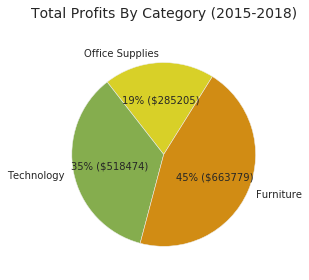

In [0]:
# Pie Chart Of Profits By Category

# Run a pie chart for Categories:
# Reference: https://www.youtube.com/watch?v=MPiz50TsyF0
# Reference: https://stackoverflow.com/questions/6170246/how-do-i-use-matplotlib-autopct

pie_labels = ['Office Supplies', 'Technology', 'Furniture']

def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val=int((pct*total/100.0) + 0.5)
        return '{p:.0f}% (${v:d})'.format(p=pct,v=val)
    return my_autopct

plt.pie(groupby_catg_totalprofits, labels = pie_labels, 
        autopct = make_autopct(groupby_catg_totalprofits),
        startangle = 58,
        colors = ['#D8D028', '#85AD4E', '#D18C14'],
        )

plt.title('Total Profits By Category (2015-2018)\n', size = 14)

plt.tight_layout()
plt.show()

### Line Plots With All Three Categories (*)

**Office Supplies**

In [0]:
# Retail data with office supplies only:

retail_data_office = retail_data[retail_data['Category'] == 'Office Supplies']

retail_data_office.head(3)


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Postal Code,Market,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Order_Date_Month,Order_Date_Year
8,40155,CA-2018-135909,2018-10-14,2018-10-21,Standard Class,JW-15220,Jane Waco,Corporate,Sacramento,California,United States,95823.0,US,West,OFF-BI-10003527,Office Supplies,Binders,Fellowes PB500 Electric Punch Plastic Comb Bin...,5083.96,5,0.2,1906.485,867.69,Low,2018-10-01,2018-01-01
10,34577,CA-2015-102988,2015-04-05,2015-04-09,Second Class,GM-14695,Greg Maxwell,Corporate,Alexandria,Virginia,United States,22304.0,US,South,OFF-SU-10002881,Office Supplies,Supplies,Martin Yale Chadless Opener Electric Letter Op...,4164.05,5,0.0,83.281,846.54,High,2015-04-01,2015-01-01
14,27704,IN-2017-73951,2017-06-06,2017-06-08,Second Class,PF-19120,Peter Fuller,Consumer,Mudanjiang,Heilongjiang,China,NaN,APAC,North Asia,OFF-AP-10003500,Office Supplies,Appliances,"KitchenAid Microwave, White",3701.52,12,0.0,1036.080,804.54,Critical,2017-06-01,2017-01-01


In [0]:
# From retail data with office supplies only, group by month and find 
# total profits for each month.

office_supp_mth_profits = retail_data_office.groupby(['Order_Date_Month'])['Profit'].sum()

office_supp_mth_profits.head()

Order_Date_Month
2015-01-01    4573.7381
2015-02-01    2336.1860
2015-03-01    6411.4282
2015-04-01    5678.5985
2015-05-01    5082.5060
Name: Profit, dtype: float64

**Furniture**

In [0]:
# Retail data with furniture only:

retail_data_furn = retail_data[retail_data['Category'] == 'Furniture']

retail_data_furn.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Postal Code,Market,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Order_Date_Month,Order_Date_Year
1,26341,IN-2017-77878,2017-02-05,2017-02-07,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,Australia,NaN,APAC,Oceania,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical,2017-02-01,2017-01-01
6,30570,IN-2015-81826,2015-11-07,2015-11-09,First Class,TS-21340,Toby Swindell,Consumer,Porirua,Wellington,New Zealand,NaN,APAC,Oceania,FUR-CH-10004050,Furniture,Chairs,"Novimex Executive Leather Armchair, Adjustable",1822.080,4,0.0,564.8400,894.77,Critical,2015-11-01,2015-01-01
7,31192,IN-2016-86369,2016-04-14,2016-04-18,Standard Class,MB-18085,Mick Brown,Consumer,Hamilton,Waikato,New Zealand,NaN,APAC,Oceania,FUR-TA-10002958,Furniture,Tables,"Chromcraft Conference Table, Fully Assembled",5244.840,6,0.0,996.4800,878.38,High,2016-04-01,2016-01-01
9,40936,CA-2016-116638,2016-01-28,2016-01-31,Second Class,JH-15985,Joseph Holt,Consumer,Concord,North Carolina,United States,28027.0,US,South,FUR-TA-10000198,Furniture,Tables,Chromcraft Bull-Nose Wood Oval Conference Tabl...,4297.644,13,0.4,-1862.3124,865.74,Critical,2016-01-01,2016-01-01
11,28879,ID-2016-28402,2016-04-19,2016-04-22,First Class,AJ-10780,Anthony Jacobs,Corporate,Kabul,Kabul,Afghanistan,NaN,APAC,Central Asia,FUR-TA-10001889,Furniture,Tables,"Bevis Conference Table, Fully Assembled",4626.150,5,0.0,647.5500,835.57,High,2016-04-01,2016-01-01


In [0]:
# From retail data with furniture only, group by month and find 
# total profits for each month.

furn_mth_profits = retail_data_furn.groupby(['Order_Date_Month'])['Profit'].sum()

furn_mth_profits.head()

Order_Date_Month
2015-01-01     691.2009
2015-02-01    2878.6208
2015-03-01    4888.2878
2015-04-01    2085.5382
2015-05-01     546.0237
Name: Profit, dtype: float64

**Technology**

In [0]:
# Retail data with technology:

retail_data_tech = retail_data[retail_data['Category'] == 'Technology']

retail_data_tech.head(3)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Postal Code,Market,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Order_Date_Month,Order_Date_Year
0,32298,CA-2016-124891,2016-07-31,2016-07-31,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,United States,10024.0,US,East,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical,2016-07-01,2016-01-01
2,25330,IN-2017-71249,2017-10-17,2017-10-18,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,Australia,NaN,APAC,Oceania,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium,2017-10-01,2017-01-01
3,13524,ES-2017-1579342,2017-01-28,2017-01-30,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,Germany,NaN,EU,Central,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium,2017-01-01,2017-01-01


In [0]:
# From retail data with technology only, group by month and find 
# total profits for each month.

tech_mth_profits = retail_data_tech.groupby(['Order_Date_Month'])['Profit'].sum()

tech_mth_profits.head()

Order_Date_Month
2015-01-01    3056.86196
2015-02-01    7203.10018
2015-03-01    4003.85226
2015-04-01    5138.18768
2015-05-01    6555.29900
Name: Profit, dtype: float64

**Plotting All Three Categories Together**

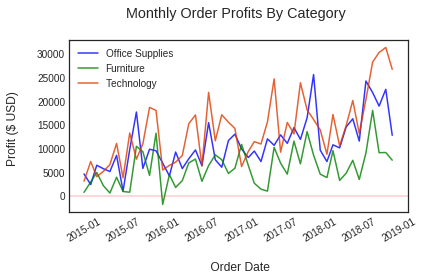

In [0]:
# Line Plots With All Three Categories

plt.style.use('seaborn-white')

sns.lineplot(x = office_supp_mth_profits.index, y = office_supp_mth_profits, 
             color = 'blue', label = "Office Supplies",
             alpha = 0.8)
sns.lineplot(x = furn_mth_profits.index, y = furn_mth_profits, 
             color = 'green', label = 'Furniture',
             alpha = 0.8)
sns.lineplot(x = tech_mth_profits.index, y = tech_mth_profits, 
             color = '#DF3A01', label = 'Technology',
             alpha = 0.8)

# Horizontal line at y = 0 for zero profit.

plt.axhline(y = 0, color = 'red', alpha = 0.2)


# Labels:

plt.xlabel('\n Order Date')
plt.ylabel('Profit ($ USD) \n')
plt.title('Monthly Order Profits By Category \n')
plt.xticks(rotation = 30)

# Tight layout:
plt.tight_layout()

plt.autoscale()
plt.savefig('monthly_orderProfits_catg.png', dpi=300, bbox_inches = "tight")

plt.show()

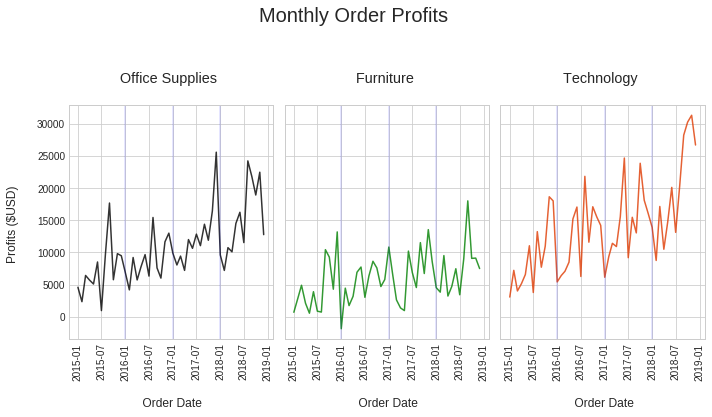

In [0]:
## A Better Plot Than The Above For Comparison

# Set style:

plt.style.use('seaborn-whitegrid')


# Subplots

fig, axes = plt.subplots(figsize = (10, 5), 
                                    nrows = 1, 
                                    ncols = 3,
                                    sharex = True,
                                    sharey = True)

# fig = overall figure
# ax1 = axis object for left plot
# ax2 = axis object for center plot
# ax3 = axis object for right plot

# Left plot
sns.lineplot(x = office_supp_mth_profits.index, y = office_supp_mth_profits, 
             color = 'black',
             alpha = 0.8,
             ax = axes[0])

# Center Plot
sns.lineplot(x = furn_mth_profits.index, y = furn_mth_profits, 
             color = 'green', 
             alpha = 0.8,
             ax = axes[1])

# Right Plot
sns.lineplot(x = tech_mth_profits.index, y = tech_mth_profits, 
             color = '#DF3A01', 
             alpha = 0.8,
             ax = axes[2])

# Vertical light blue lines to separate years:

for i in range(3):
  axes[i].axvline(x = '2018-01-01', linewidth=2, color='blue', alpha = 0.10)
  axes[i].axvline(x = '2017-01-01', linewidth=2, color='blue', alpha = 0.10)
  axes[i].axvline(x = '2016-01-01', linewidth=2, color='blue', alpha = 0.10)

# Set titles:

axes[0].set_title('Office Supplies \n')

axes[1].set_title('Furniture \n')

axes[2].set_title('Technology \n')

# y-axis Label:

axes[0].set_ylabel("Profits ($USD) \n")

# x-axis labels for labelling and rotation:
# https://stackoverflow.com/questions/31186019/rotate-tick-labels-in-subplot-pyplot-matplotlib-gridspec

for j in range(3):
  axes[j].set_xlabel('\n Order Date')
  axes[j].tick_params(axis = 'x', labelrotation = 90)

# Main title:
plt.suptitle('Monthly Order Profits \n', 
             size = 20, 
             y = 1.15)

plt.tight_layout()


# Save figure:

plt.autoscale()
plt.savefig('monthly_orderProfits_catg.png', dpi=300, bbox_inches = "tight")

plt.show()

# ARIMA Model Fit & Forecasting On Monthly Sales


Recall that in the brief the global sales team would like forecasts on sales & profit for 2019 Q3.

They would like to know sales and profit by category by month.

Three main categories are office supplies, furniture and technology.


In [0]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

## Model Fit On Sales

In [0]:
# Look at monthly sales data:

sales_permonth.head(12)

Order_Date_Month
2015-01-01     98898.48886
2015-02-01     91152.15698
2015-03-01    145729.36736
2015-04-01    116915.76418
2015-05-01    146747.83610
2015-06-01    215207.38022
2015-07-01    115510.41912
2015-08-01    207581.49122
2015-09-01    290214.45534
2015-10-01    199071.26404
2015-11-01    298496.53752
2015-12-01    333925.73460
Name: Sales, dtype: float64

### Check ACF & PACF Plot

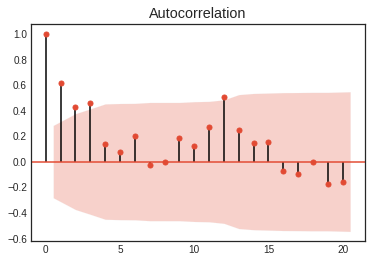

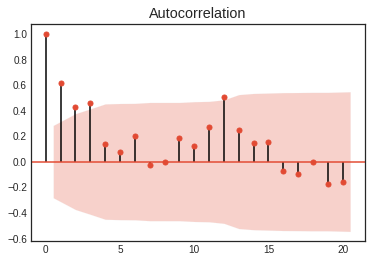

In [0]:
# plot_acf function with 95% confidence (set alpha a 0.05)
# Reference: https://www.datasciencesmachinelearning.com/2019/01/arimasarima-in-python.html

plot_acf(sales_permonth, lags = 20, alpha = 0.05)

In [0]:
# plot_pacf function with 95% confidence (set alpha at 0.05)

sales_permonth_diff = sales_permonth.diff()

sales_permonth_diff = sales_permonth_diff.dropna()

sales_permonth_diff

Order_Date_Month
2015-02-01     -7746.33188
2015-03-01     54577.21038
2015-04-01    -28813.60318
2015-05-01     29832.07192
2015-06-01     68459.54412
2015-07-01    -99696.96110
2015-08-01     92071.07210
2015-09-01     82632.96412
2015-10-01    -91143.19130
2015-11-01     99425.27348
2015-12-01     35429.19708
2016-01-01   -198145.01436
2016-02-01    -35270.50326
2016-03-01     62566.55418
2016-04-01     -2024.50164
2016-05-01     47312.62172
2016-06-01     47810.80718
2016-07-01   -110938.91330
2016-08-01    157906.15726
2016-09-01    -13753.77674
2016-10-01    -36449.31544
2016-11-01     70572.56670
2016-12-01     14744.54970
2017-01-01   -139071.05922
2017-02-01    -31946.25698
2017-03-01     31354.37972
2017-04-01    -20772.71328
2017-05-01     82677.24786
2017-06-01    136021.04720
2017-07-01   -166590.65990
2017-08-01     96559.83736
2017-09-01     50130.45632
2017-10-01    -83212.60280
2017-11-01     80582.71722
2017-12-01     31465.01792
2018-01-01   -164185.82236
2018-02-01 

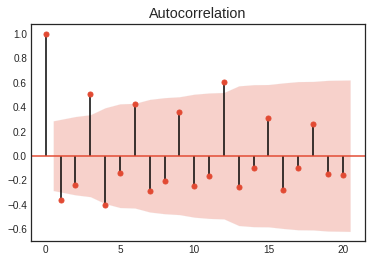

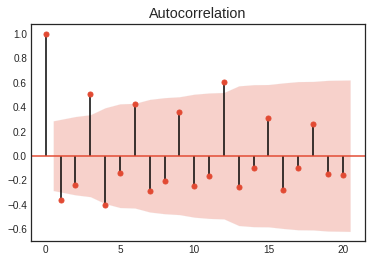

In [0]:
# Plot pacf with acf on differenced data:

plot_acf(sales_permonth_diff, lags = 20, alpha = 0.05)

### Adj. Dickey-Fuller Tests


In [0]:
from statsmodels.tsa.stattools import adfuller

In [0]:
# Reference: https://www.datasciencesmachinelearning.com/2018/12/time-series-basic-concepts.html

adj_dfuller_results = adfuller(sales_permonth)

print(f'ADF Test Statistic: {adj_dfuller_results[0]:.3f}')
print(f'p-value: {adj_dfuller_results[1]:.3f}')
print(f'Number Of Lags: {adj_dfuller_results[2]:.0f}')
print(f'Number Of Observations Used: {adj_dfuller_results[3]:.0f}')
print('Critical values for test statistic.')
for key, value in adj_dfuller_results[4].items():
  print(f'{key}: {value:.2f}')

ADF Test Statistic: 0.618
p-value: 0.988
Number Of Lags: 10
Number Of Observations Used: 37
Critical values for test statistic.
1%: -3.62
5%: -2.94
10%: -2.61


From the Adjusted Dickey-Fuller Test I fail to reject the null hypothesis of the data being stationary. The data is **not stationary**.

I would need to difference the `sales_per_month` variable and run the Dickey-Fuller test again.

In [0]:
adj_dfuller_results2 = adfuller(sales_permonth_diff)

print(f'ADF Test Statistic: {adj_dfuller_results2[0]:.3f}')
print(f'p-value: {adj_dfuller_results2[1]:.3f}')
print(f'Number Of Lags: {adj_dfuller_results2[2]:.0f}')
print(f'Number Of Observations Used: {adj_dfuller_results2[3]:.0f}')
print('Critical values for test statistic.')
for key, value in adj_dfuller_results2[4].items():
  print(f'{key}: {value:.2f}')

ADF Test Statistic: -8.602
p-value: 0.000
Number Of Lags: 10
Number Of Observations Used: 36
Critical values for test statistic.
1%: -3.63
5%: -2.95
10%: -2.61


The p-value is less than 5% meaning that the test is significant. The model is now stationary (root/solution is outside unit circle) from Adjusted Dickey Fuller test. Only one differencing is required.

### Train Test Split

In [0]:
# Train Data: Sales Per Month 2015 - 2017 Years

train_sales_permonth = sales_permonth[sales_permonth.index < '2018-01-01']

train_sales_permonth.head()

Order_Date_Month
2015-01-01     98898.48886
2015-02-01     91152.15698
2015-03-01    145729.36736
2015-04-01    116915.76418
2015-05-01    146747.83610
Name: Sales, dtype: float64

In [0]:
# Test Data: Sales Per Month 2018 Year only

test_sales_permonth = sales_permonth[sales_permonth.index >= '2018-01-01']

test_sales_permonth

Order_Date_Month
2018-01-01    241268.55566
2018-02-01    184837.35556
2018-03-01    263100.77262
2018-04-01    242771.86130
2018-05-01    288401.04614
2018-06-01    401814.06310
2018-07-01    258705.68048
2018-08-01    456619.94236
2018-09-01    481157.24370
2018-10-01    422766.62916
2018-11-01    555279.02700
2018-12-01    503143.69348
Name: Sales, dtype: float64

### Testing Out auto.arima

In [0]:
pip install pyramid-arima

     |████████████████████████████████| 604kB 5.0MB/s 


In [0]:
from pyramid.arima import auto_arima

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/pyramid/__init__.py:68: UserWarning: 
    The 'pyramid' package will be migrating to a new namespace beginning in 
    version 1.0.0: 'pmdarima'. This is due to a pac

In [0]:
# auto_arima with default 'kpss' & AIC test gives SARIMA(2, 1, 0)(1, 0, 0, 12)

auto_arima(train_sales_permonth, m = 12, stepwise = True, trace = True)

/usr/local/lib/python3.6/dist-packages/pyramid/arima/auto.py:864: ModelFitWarning: Unable to fit ARIMA for order=(2, 1, 2) seasonal_order=(1, 0, 1, 12); data is likely non-stationary. (if you do not want to see these warnings, run with error_action="ignore")
  ModelFitWarning)
/usr/local/lib/python3.6/dist-packages/pyramid/arima/auto.py:864: ModelFitWarning: Unable to fit ARIMA for order=(0, 1, 1) seasonal_order=(0, 0, 1, 12); data is likely non-stationary. (if you do not want to see these warnings, run with error_action="ignore")
  ModelFitWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:981: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


Fit ARIMA: order=(2, 1, 2) seasonal_order=(1, 0, 1, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 12); AIC=896.814, BIC=899.925, Fit time=0.063 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 0, 0, 12); AIC=889.722, BIC=895.944, Fit time=0.074 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 0, 1, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 0, 0, 12); AIC=894.550, BIC=899.216, Fit time=0.025 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(2, 0, 0, 12); AIC=891.705, BIC=899.482, Fit time=0.182 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 0, 1, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(2, 0, 1, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(1, 0, 0, 12); AIC=890.682, BIC=895.348, Fit time=0.169 seconds


/usr/local/lib/python3.6/dist-packages/pyramid/arima/auto.py:864: ModelFitWarning: Unable to fit ARIMA for order=(1, 1, 0) seasonal_order=(1, 0, 1, 12); data is likely non-stationary. (if you do not want to see these warnings, run with error_action="ignore")
  ModelFitWarning)
/usr/local/lib/python3.6/dist-packages/pyramid/arima/auto.py:864: ModelFitWarning: Unable to fit ARIMA for order=(1, 1, 0) seasonal_order=(2, 0, 1, 12); data is likely non-stationary. (if you do not want to see these warnings, run with error_action="ignore")
  ModelFitWarning)


Fit ARIMA: order=(2, 1, 0) seasonal_order=(1, 0, 0, 12); AIC=885.363, BIC=893.140, Fit time=0.117 seconds
Fit ARIMA: order=(2, 1, 1) seasonal_order=(1, 0, 0, 12); AIC=885.412, BIC=894.744, Fit time=0.149 seconds
Fit ARIMA: order=(3, 1, 1) seasonal_order=(1, 0, 0, 12); AIC=887.306, BIC=898.193, Fit time=0.185 seconds
Fit ARIMA: order=(2, 1, 0) seasonal_order=(0, 0, 0, 12); AIC=888.730, BIC=894.951, Fit time=0.034 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:981: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


Fit ARIMA: order=(2, 1, 0) seasonal_order=(2, 0, 0, 12); AIC=887.191, BIC=896.523, Fit time=0.236 seconds
Fit ARIMA: order=(2, 1, 0) seasonal_order=(1, 0, 1, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(2, 1, 0) seasonal_order=(2, 0, 1, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(3, 1, 0) seasonal_order=(1, 0, 0, 12); AIC=885.759, BIC=895.091, Fit time=0.115 seconds
Total fit time: 1.402 seconds


/usr/local/lib/python3.6/dist-packages/pyramid/arima/auto.py:864: ModelFitWarning: Unable to fit ARIMA for order=(2, 1, 0) seasonal_order=(1, 0, 1, 12); data is likely non-stationary. (if you do not want to see these warnings, run with error_action="ignore")
  ModelFitWarning)
/usr/local/lib/python3.6/dist-packages/pyramid/arima/auto.py:864: ModelFitWarning: Unable to fit ARIMA for order=(2, 1, 0) seasonal_order=(2, 0, 1, 12); data is likely non-stationary. (if you do not want to see these warnings, run with error_action="ignore")
  ModelFitWarning)


ARIMA(callback=None, disp=0, maxiter=50, method=None, order=(2, 1, 0),
      out_of_sample_size=0, scoring='mse', scoring_args={},
      seasonal_order=(1, 0, 0, 12), solver='lbfgs', start_params=None,
      suppress_warnings=False, transparams=True, trend='c')

In [0]:
# auto_arima with adjusted dickey fuller test gives SARIMA(3, 0, 2)(1, 0, 0, 12)
# default is AIC:

auto_arima(train_sales_permonth, test =  'adf', m = 12, stepwise = True, trace = True)

Fit ARIMA: order=(2, 0, 2) seasonal_order=(1, 0, 1, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 0, 0) seasonal_order=(0, 0, 0, 12); AIC=927.775, BIC=930.942, Fit time=0.008 seconds


/usr/local/lib/python3.6/dist-packages/pyramid/arima/auto.py:864: ModelFitWarning: Unable to fit ARIMA for order=(2, 0, 2) seasonal_order=(1, 0, 1, 12); data is likely non-stationary. (if you do not want to see these warnings, run with error_action="ignore")
  ModelFitWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:981: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
/usr/local/lib/python3.6/dist-packages/pyramid/arima/auto.py:864: ModelFitWarning: Unable to fit ARIMA for order=(0, 0, 1) seasonal_order=(0, 0, 1, 12); data is likely non-stationary. (if you do not want to see these warnings, run with error_action="ignore")
  ModelFitWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:981: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starti

Fit ARIMA: order=(1, 0, 0) seasonal_order=(1, 0, 0, 12); AIC=911.237, BIC=917.571, Fit time=0.081 seconds
Fit ARIMA: order=(0, 0, 1) seasonal_order=(0, 0, 1, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(0, 0, 0, 12); AIC=917.748, BIC=922.499, Fit time=0.019 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(2, 0, 0, 12); AIC=912.098, BIC=920.016, Fit time=0.224 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(1, 0, 1, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(2, 0, 1, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 0, 0) seasonal_order=(1, 0, 0, 12); AIC=928.592, BIC=933.343, Fit time=0.041 seconds
Fit ARIMA: order=(2, 0, 0) seasonal_order=(1, 0, 0, 12); AIC=912.611, BIC=920.529, Fit time=0.087 seconds


/usr/local/lib/python3.6/dist-packages/pyramid/arima/auto.py:864: ModelFitWarning: Unable to fit ARIMA for order=(1, 0, 0) seasonal_order=(1, 0, 1, 12); data is likely non-stationary. (if you do not want to see these warnings, run with error_action="ignore")
  ModelFitWarning)
/usr/local/lib/python3.6/dist-packages/pyramid/arima/auto.py:864: ModelFitWarning: Unable to fit ARIMA for order=(1, 0, 0) seasonal_order=(2, 0, 1, 12); data is likely non-stationary. (if you do not want to see these warnings, run with error_action="ignore")
  ModelFitWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:981: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:981: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starti

Fit ARIMA: order=(1, 0, 1) seasonal_order=(1, 0, 0, 12); AIC=907.199, BIC=915.117, Fit time=0.104 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:981: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


Fit ARIMA: order=(2, 0, 2) seasonal_order=(1, 0, 0, 12); AIC=910.274, BIC=921.359, Fit time=0.223 seconds
Fit ARIMA: order=(1, 0, 1) seasonal_order=(0, 0, 0, 12); AIC=919.215, BIC=925.549, Fit time=0.030 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:981: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


Fit ARIMA: order=(1, 0, 1) seasonal_order=(2, 0, 0, 12); AIC=909.195, BIC=918.696, Fit time=0.318 seconds
Fit ARIMA: order=(1, 0, 1) seasonal_order=(1, 0, 1, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 0, 1) seasonal_order=(2, 0, 1, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 0, 1) seasonal_order=(1, 0, 0, 12); AIC=919.281, BIC=925.615, Fit time=0.064 seconds


/usr/local/lib/python3.6/dist-packages/pyramid/arima/auto.py:864: ModelFitWarning: Unable to fit ARIMA for order=(1, 0, 1) seasonal_order=(1, 0, 1, 12); data is likely non-stationary. (if you do not want to see these warnings, run with error_action="ignore")
  ModelFitWarning)
/usr/local/lib/python3.6/dist-packages/pyramid/arima/auto.py:864: ModelFitWarning: Unable to fit ARIMA for order=(1, 0, 1) seasonal_order=(2, 0, 1, 12); data is likely non-stationary. (if you do not want to see these warnings, run with error_action="ignore")
  ModelFitWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:981: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting 

Fit ARIMA: order=(2, 0, 1) seasonal_order=(1, 0, 0, 12); AIC=905.843, BIC=915.344, Fit time=0.334 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:981: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


Fit ARIMA: order=(3, 0, 2) seasonal_order=(1, 0, 0, 12); AIC=901.395, BIC=914.063, Fit time=0.555 seconds
Fit ARIMA: order=(3, 0, 2) seasonal_order=(0, 0, 0, 12); AIC=905.923, BIC=917.008, Fit time=0.240 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:981: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


Fit ARIMA: order=(3, 0, 2) seasonal_order=(2, 0, 0, 12); AIC=903.366, BIC=917.618, Fit time=1.279 seconds
Fit ARIMA: order=(3, 0, 2) seasonal_order=(1, 0, 1, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(3, 0, 2) seasonal_order=(2, 0, 1, 12); AIC=nan, BIC=nan, Fit time=nan seconds


/usr/local/lib/python3.6/dist-packages/pyramid/arima/auto.py:864: ModelFitWarning: Unable to fit ARIMA for order=(3, 0, 2) seasonal_order=(1, 0, 1, 12); data is likely non-stationary. (if you do not want to see these warnings, run with error_action="ignore")
  ModelFitWarning)
/usr/local/lib/python3.6/dist-packages/pyramid/arima/auto.py:864: ModelFitWarning: Unable to fit ARIMA for order=(3, 0, 2) seasonal_order=(2, 0, 1, 12); data is likely non-stationary. (if you do not want to see these warnings, run with error_action="ignore")
  ModelFitWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:981: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


Fit ARIMA: order=(4, 0, 2) seasonal_order=(1, 0, 0, 12); AIC=903.367, BIC=917.619, Fit time=0.624 seconds
Fit ARIMA: order=(3, 0, 1) seasonal_order=(1, 0, 0, 12); AIC=905.682, BIC=916.766, Fit time=0.197 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:981: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:981: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


Fit ARIMA: order=(3, 0, 3) seasonal_order=(1, 0, 0, 12); AIC=906.677, BIC=920.929, Fit time=0.727 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:981: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


Fit ARIMA: order=(4, 0, 3) seasonal_order=(1, 0, 0, 12); AIC=904.340, BIC=920.175, Fit time=0.563 seconds
Total fit time: 5.770 seconds


ARIMA(callback=None, disp=0, maxiter=50, method=None, order=(3, 0, 2),
      out_of_sample_size=0, scoring='mse', scoring_args={},
      seasonal_order=(1, 0, 0, 12), solver='lbfgs', start_params=None,
      suppress_warnings=False, transparams=True, trend='c')

In [0]:
# Using auto_arima again but with BIC info criterion and adf test
# Got SARIMA(1, 0, 1)(1, 0, 0, 12)

auto_arima(train_sales_permonth, test =  'adf', m = 12, stepwise = True, trace = True,
           information_criterion = 'bic')

Fit ARIMA: order=(2, 0, 2) seasonal_order=(1, 0, 1, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 0, 0) seasonal_order=(0, 0, 0, 12); AIC=927.775, BIC=930.942, Fit time=0.008 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(1, 0, 0, 12); AIC=911.237, BIC=917.571, Fit time=0.085 seconds
Fit ARIMA: order=(0, 0, 1) seasonal_order=(0, 0, 1, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(0, 0, 0, 12); AIC=917.748, BIC=922.499, Fit time=0.020 seconds


/usr/local/lib/python3.6/dist-packages/pyramid/arima/auto.py:864: ModelFitWarning: Unable to fit ARIMA for order=(2, 0, 2) seasonal_order=(1, 0, 1, 12); data is likely non-stationary. (if you do not want to see these warnings, run with error_action="ignore")
  ModelFitWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:981: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
/usr/local/lib/python3.6/dist-packages/pyramid/arima/auto.py:864: ModelFitWarning: Unable to fit ARIMA for order=(0, 0, 1) seasonal_order=(0, 0, 1, 12); data is likely non-stationary. (if you do not want to see these warnings, run with error_action="ignore")
  ModelFitWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:981: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starti

Fit ARIMA: order=(1, 0, 0) seasonal_order=(2, 0, 0, 12); AIC=912.098, BIC=920.016, Fit time=0.221 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(1, 0, 1, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(2, 0, 1, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 0, 0) seasonal_order=(1, 0, 0, 12); AIC=928.592, BIC=933.343, Fit time=0.044 seconds
Fit ARIMA: order=(2, 0, 0) seasonal_order=(1, 0, 0, 12); AIC=912.611, BIC=920.529, Fit time=0.087 seconds


/usr/local/lib/python3.6/dist-packages/pyramid/arima/auto.py:864: ModelFitWarning: Unable to fit ARIMA for order=(1, 0, 0) seasonal_order=(1, 0, 1, 12); data is likely non-stationary. (if you do not want to see these warnings, run with error_action="ignore")
  ModelFitWarning)
/usr/local/lib/python3.6/dist-packages/pyramid/arima/auto.py:864: ModelFitWarning: Unable to fit ARIMA for order=(1, 0, 0) seasonal_order=(2, 0, 1, 12); data is likely non-stationary. (if you do not want to see these warnings, run with error_action="ignore")
  ModelFitWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:981: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:981: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starti

Fit ARIMA: order=(1, 0, 1) seasonal_order=(1, 0, 0, 12); AIC=907.199, BIC=915.117, Fit time=0.104 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:981: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


Fit ARIMA: order=(2, 0, 2) seasonal_order=(1, 0, 0, 12); AIC=910.274, BIC=921.359, Fit time=0.224 seconds
Fit ARIMA: order=(1, 0, 1) seasonal_order=(0, 0, 0, 12); AIC=919.215, BIC=925.549, Fit time=0.029 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:981: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


Fit ARIMA: order=(1, 0, 1) seasonal_order=(2, 0, 0, 12); AIC=909.195, BIC=918.696, Fit time=0.311 seconds
Fit ARIMA: order=(1, 0, 1) seasonal_order=(1, 0, 1, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 0, 1) seasonal_order=(2, 0, 1, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 0, 1) seasonal_order=(1, 0, 0, 12); AIC=919.281, BIC=925.615, Fit time=0.067 seconds


/usr/local/lib/python3.6/dist-packages/pyramid/arima/auto.py:864: ModelFitWarning: Unable to fit ARIMA for order=(1, 0, 1) seasonal_order=(1, 0, 1, 12); data is likely non-stationary. (if you do not want to see these warnings, run with error_action="ignore")
  ModelFitWarning)
/usr/local/lib/python3.6/dist-packages/pyramid/arima/auto.py:864: ModelFitWarning: Unable to fit ARIMA for order=(1, 0, 1) seasonal_order=(2, 0, 1, 12); data is likely non-stationary. (if you do not want to see these warnings, run with error_action="ignore")
  ModelFitWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:981: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting 

Fit ARIMA: order=(2, 0, 1) seasonal_order=(1, 0, 0, 12); AIC=905.843, BIC=915.344, Fit time=0.318 seconds
Fit ARIMA: order=(1, 0, 2) seasonal_order=(1, 0, 0, 12); AIC=910.103, BIC=919.604, Fit time=0.190 seconds
Total fit time: 1.741 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:981: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


ARIMA(callback=None, disp=0, maxiter=50, method=None, order=(1, 0, 1),
      out_of_sample_size=0, scoring='mse', scoring_args={},
      seasonal_order=(1, 0, 0, 12), solver='lbfgs', start_params=None,
      suppress_warnings=False, transparams=True, trend='c')

## SARIMA Model Fit With Train & Test Data Between Two Models

I want to compare three different models I got from `auto.arima`. These three are:

1. SARIMA(2, 1, 0)(1, 0, 0, 12) with kpps stationarity test and AIC info criterion
2. SARIMA(3, 0, 2)(1, 0, 0, 12) with adf stationarity test and AIC info criterion
3. SARIMA(1, 0, 1)(1, 0, 0, 12) with adf stationarity test and BIC info criterion

I want to use the Adjusted Dickey Fuller (adf) test for stationarity as I am familiar with it. Also, I am preferring a model with a lower BIC.

But let's look at models 2 and 3 for prediction scores. 

In [0]:
import statsmodels.api as sm

Metrics to Consider After Model Fit

1. Mean Squared Error Between Actual & Predicted
2. Mean Absolute Percentage Error (MAPE)
3. Correlation Between Predicted & Actual Values

* `mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE`
* `corr = np.corrcoef(forecast, actual)[0,1]   # corr`

In [0]:
# Look at data:

sales_permonth.head()

Order_Date_Month
2015-01-01     98898.48886
2015-02-01     91152.15698
2015-03-01    145729.36736
2015-04-01    116915.76418
2015-05-01    146747.83610
Name: Sales, dtype: float64

### Fit SARIMA(3, 0, 2)(1, 0, 0, 12) On Train Data

In [0]:
import statsmodels.api as sm

In [0]:
# Reference: https://www.datasciencesmachinelearning.com/2019/01/arimasarima-in-python.html

sarima_302_train_sales = sm.tsa.statespace.SARIMAX(train_sales_permonth,
                                       order = (3, 0, 2),
                                       seasonal_order = (1, 0, 0, 12),
                                       enforce_stationarity = False,
                                       enforce_invertibility = False)

results_302_train_sales = sarima_302_train.fit()

print(results_302_train_sales.summary())

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


NameError: ignored

In [0]:
# Model Diganostics (Not sure why it plots twice)
# Residuals look okay. 

results_302_train_sales.plot_diagnostics(figsize = (10, 9))

### Forecasts on 2018 Data (Test Data)

In [0]:
# Use .get_forecast to obtain forecasts.

forecasts_sales302 = results_302_train_sales.get_forecast(steps = 12)

forecasts_sales302.summary_frame()

In [0]:
# Obtain forecasts from mean column.

forecasts_meansales302 = forecasts_sales302.summary_frame()['mean']

forecasts_meansales302

##### RMSE, Correlation & Mean Abs. Pct Error

In [0]:
# Root Mean Squared Error:

mse_302 = np.mean((forecasts_meansales302 - test_sales_permonth)**2)

rmse_302 = mse_302 ** 0.5

rmse_302

In [0]:
# Correlation Between Forecasted 2018 Values & Actual 2018 Sales Per Month

corr_302 = np.corrcoef(forecasts_meansales302, test_sales_permonth)[0, 1]

corr_302

In [0]:
# Mean Absolute Percentage Error

mean_abs_percent_error_302 = np.mean(np.abs(forecasts_meansales302 - test_sales_permonth)/np.abs(test_sales_permonth)) 

mean_abs_percent_error_302

### Fit SARIMA(1, 0, 1)(1, 0, 0, 12) On Train Data

In [0]:
# Reference: https://www.datasciencesmachinelearning.com/2019/01/arimasarima-in-python.html

sarima_101_train_sales = sm.tsa.statespace.SARIMAX(train_sales_permonth,
                                       order = (1, 0, 1),
                                       seasonal_order = (1, 0, 0, 12),
                                       enforce_stationarity = False,
                                       enforce_invertibility = False)

results_101_train_sales = sarima_101_train_sales.fit()

print(results_101_train_sales.summary())

In [0]:
# Model Diganostics (Not sure why it plots twice)
# Residuals look okay. 

results_101_train_sales.plot_diagnostics(figsize = (10, 9))

### Forecasts On Test Data

In [0]:
forecasts_sales101 = results_101_train_sales.get_forecast(steps = 12)

forecasts_sales101.summary_frame()

In [0]:
# Obtain means from forecasts:

forecasts_meansales101 = forecasts_sales101.summary_frame()['mean']

forecasts_meansales101

##### RMSE, Correlation & Mean Abs. Pct Error 


In [0]:
# Root Mean Squared Error:

mse_101 = np.mean((forecasts_meansales101 - test_sales_permonth)**2)

rmse_101 = mse_101 ** 0.5

rmse_101

In [0]:
# Correlation Between Forecasted 2018 Values & Actual 2018 Sales Per Month

corr_101 = np.corrcoef(forecasts_meansales101, test_sales_permonth)

corr_101

In [0]:
# Mean Absolute Percentage Error

mean_abs_percent_error_101 = np.mean(np.abs(forecasts_meansales101 - test_sales_permonth)/np.abs(test_sales_permonth)) 

mean_abs_percent_error_101

# Choosing SARIMA(1, 0, 1)(1, 0, 0, 12) For Monthly Sales

I am choosing the SARIMA(1, 0, 1)(1, 0, 0, 12) model as it consistently predicts better than the SARIMA(3, 0, 2)(1, 0, 0, 12) model. The Root Mean Squared Error is lower and the mean absolute percent error is lower in SARIMA(1, 0, 1)(1, 0, 0, 12) vs SARIMA(3, 0, 2)(1, 0, 0, 12).

Put chart of model diagnostics.

In [0]:
# Reference: https://www.datasciencesmachinelearning.com/2019/01/arimasarima-in-python.html

sarima_sales_101 = sm.tsa.statespace.SARIMAX(sales_permonth,
                                       order = (1, 0, 1),
                                       seasonal_order = (1, 0, 0, 12),
                                       enforce_stationarity = False,
                                       enforce_invertibility = False)

results_sales_101 = sarima_sales_101 .fit()

print(results_sales_101.summary())

In [0]:
# Model Diganostics (Not sure why it plots twice)

results_sales_101.plot_diagnostics(figsize = (10, 9))

## Forecasts On Overall Monthly Sales

In [0]:
forecasts_sales101 = results_sales_101.get_forecast(steps = 12)

forecasts_sales101.summary_frame()

In [0]:
# Obtain means from forecasts:

forecasts_meansales101 = forecasts_sales101.summary_frame()['mean']

forecasts_meansales101

In [0]:
# Sales per month before 2019:

sales_permonth_pre2019 = sales_permonth[sales_permonth.index < '2019-01-01']

sales_permonth_pre2019.tail()

In [0]:
# Monthly sales before 2019 and including the forecasted 
# January 2019 sales (to connect lines in plot)

sales_mth_pre2019 = sales_permonth_pre2019.append(forecasts_meansales101.head(1))

sales_mth_pre2019.tail()

In [0]:
# Line Plots (Blue is historical data, green is forecasted)

sns.lineplot(x = sales_mth_pre2019.index, y = sales_mth_pre2019, color = 'blue')
sns.lineplot(x = forecasts_meansales101.index, y = forecasts_meansales101, color = 'green')
#plt.axvline(pd.Timestamp('2019-01-01'), color= 'green', alpha = 0.5)